In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
import seaborn as sns

In [2]:
# plt.style.use('grayscale')

In [3]:
# load R %magic
# import rpy2
# %load_ext rpy2.ipython

In [4]:
data=pd.read_csv("resultados_nov3.csv", sep=";", decimal=".", index_col=0)
data.sample(15)

,n,mean,sd,median,trimmed,range,skew,kurtosis,se,IRT_difficulty,...,infitZ,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA,judge_agree,process,n_jueces
item_code,,,,,,,,,,,,,,,,,,,,,
SE_48,40,0.425000,0.500641,0.0,0.406250,1,0.292126,-2.000000,0.079158,0.302281,...,1.000000,0.857143,0.000000,0.000000,1.000000,0.857143,0.857143,0.000000,0,1
MX_36a,39,0.461538,0.505035,0.0,0.454545,1,0.148407,-2.000000,0.080870,0.154151,...,2.000000,0.857143,0.857143,1.000000,0.857143,0.000000,0.666667,1.000000,transfer,3
ME_79,40,0.325000,0.474342,0.0,0.281250,1,0.719418,-2.000000,0.075000,0.730888,...,-0.895884,0.766667,0.642857,0.642857,1.000000,0.766667,0.642857,1.000000,transfer,3
PS_45b,111,0.054054,0.227150,0.0,0.000000,1,4.000000,13.000000,0.021560,3.000000,...,-0.144276,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,1.000000,transfer,3
ST_25b2,40,0.350000,0.483046,0.0,0.312500,1,0.605533,-2.000000,0.076376,0.619039,...,0.826933,0.333333,0.333333,0.333333,0.333333,0.733333,0.333333,1.000000,retention,3
LP_16d,38,0.421053,0.500355,0.0,0.406250,1,0.307261,-2.000000,0.081168,0.318454,...,0.189887,1.000000,1.000000,1.000000,0.857143,0.857143,0.857143,1.000000,transfer,2
LF_39,39,0.076923,0.269953,0.0,0.000000,1,3.000000,8.000000,0.043227,2.000000,...,0.728513,1.000000,1.000000,1.000000,0.857143,0.857143,0.857143,1.000000,transfer,2
MX_53,38,0.289474,0.459606,0.0,0.250000,1,0.892008,-1.000000,0.074558,0.897942,...,0.560989,0.642857,0.642857,0.642857,0.500000,0.300000,0.300000,0.666667,retention,3
ST_54b3,39,0.487179,0.506370,0.0,0.484848,1,0.049339,-2.000000,0.081084,0.051293,...,0.029699,1.000000,1.000000,1.000000,0.666667,0.400000,0.666667,1.000000,retention,2


# Propiedades de los reactivos

In [5]:
psicom_dat=data[['n', 'mean', 'IRT_difficulty', 'Chisq', 'df', 'p_value', 'outfitMSQ', 'infitMSQ']]
# psicom_dat=data[['n', 'mean', 'IRT_difficulty', 'outfitMSQ', 'infitMSQ']]
psicom_dat.sample(15)

,n,mean,IRT_difficulty,Chisq,df,p_value,outfitMSQ,infitMSQ
item_code,,,,,,,,
ME_7a,38,0.315789,0.773190,33,37,0.644672,0.875496,0.867058
SE_31b,40,0.725000,-0.969401,41,39,0.386592,1.000000,1.000000
SE_10,40,0.550000,-0.200671,41,38,0.347957,1.000000,1.000000
EM_35,40,0.550000,-0.200671,40,39,0.438028,0.992884,0.999909
ME_69b,26,0.153846,2.000000,20,17,0.254792,1.000000,0.964786
ST_59,40,0.575000,-0.302281,37,39,0.573017,0.918714,0.933873
EM_45b,40,0.525000,-0.100083,41,39,0.380814,1.000000,1.000000
VB_12d,41,0.658537,-0.656780,40,40,0.465094,0.978449,0.971635
PS_51a,40,0.550000,-0.200671,43,39,0.308526,1.000000,1.000000


In [6]:
round(psicom_dat.describe(),2)
# psicom_dat.describe()

,n,mean,IRT_difficulty,Chisq,df,p_value,outfitMSQ,infitMSQ
count,134.0,134.00,134.00,134.00,134.00,134.00,134.00,134.00
mean,40.4,0.41,0.44,39.31,38.42,0.48,0.95,0.95
std,8.8,0.21,1.01,14.66,9.43,0.25,0.31,0.12
min,26.0,0.05,-2.00,4.00,17.00,0.00,0.12,0.43
25%,39.0,0.25,-0.20,34.00,37.00,0.29,0.87,0.90
50%,40.0,0.40,0.41,38.00,39.00,0.48,0.97,0.98
75%,40.0,0.55,1.00,43.00,39.00,0.65,1.00,1.00
max,111.0,0.87,3.00,156.00,110.00,1.00,4.00,2.00


In [7]:
psicom_dat[psicom_dat.p_value<.1]

,n,mean,IRT_difficulty,Chisq,df,p_value,outfitMSQ,infitMSQ
item_code,,,,,,,,
EM_45c,40,0.125000,2.000000,156,38,0.000000,4.0,0.939853
EM_48b,40,0.125000,2.000000,57,39,0.033030,1.0,1.000000
II_20b,40,0.175000,2.000000,47,36,0.097087,1.0,1.000000
LF_18a,37,0.405405,0.382992,63,30,0.000352,2.0,2.000000
LF_39,39,0.076923,2.000000,40,26,0.038150,1.0,1.000000
ST_25b1,40,0.175000,2.000000,54,39,0.051331,1.0,1.000000
ST_25b2,40,0.350000,0.619039,53,39,0.071117,1.0,1.000000


# Análisis de desempeño

In [8]:
data.drop(["EM_45c","LF_18a","LF_31b"],inplace=True)

In [9]:
round(data[["KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"]].describe(),3)

,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA
count,131.000,131.000,131.000,131.000,131.000,131.000
mean,0.721,0.697,0.529,0.642,0.491,0.594
std,0.297,0.315,0.342,0.304,0.312,0.299
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.500,0.500,0.333,0.367,0.300,0.333
50%,0.767,0.733,0.643,0.667,0.500,0.643
75%,1.000,1.000,0.883,1.000,0.700,0.812
max,1.000,1.000,1.000,1.000,1.000,1.000


In [10]:
pd.crosstab(data.process, columns="count")

col_0,count
process,
0,28
retention,10
transfer,93


In [11]:
dat_2=data.loc[(data.process=="transfer")|(data.process=="retention"),["IRT_difficulty","KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA","process"]]
# dat_2.set_index("item_code", inplace=True)
dat_2.sample(15)

,IRT_difficulty,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA,process
item_code,,,,,,,,
MX_46b,1.000000,0.642857,0.642857,0.642857,0.642857,0.500000,0.642857,transfer
MS_39,0.302281,0.000000,0.666667,1.000000,0.666667,0.000000,0.000000,transfer
LF_13a,0.356675,0.333333,0.333333,0.333333,0.733333,0.333333,0.333333,transfer
PS_51b,-0.362905,1.000000,1.000000,1.000000,1.000000,0.333333,0.333333,transfer
SE_46,0.405465,1.000000,0.733333,0.333333,0.733333,0.733333,0.733333,transfer
SE_3c,0.810930,0.857143,1.000000,1.000000,0.857143,0.000000,1.000000,transfer
MX_11e,2.000000,0.642857,0.642857,0.642857,0.642857,0.642857,0.642857,transfer
MX_49,2.000000,0.733333,0.333333,0.333333,0.333333,0.333333,0.733333,transfer
LF_28a2,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,transfer


Text(0.5, 1.0, 'IRT difficulty')

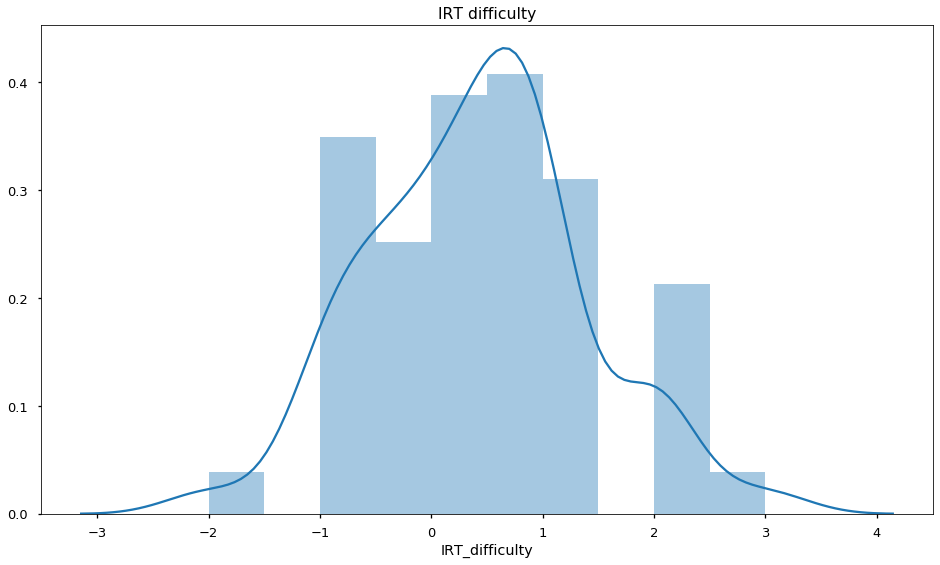

In [12]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("IRT difficulty")
# plt.legend()

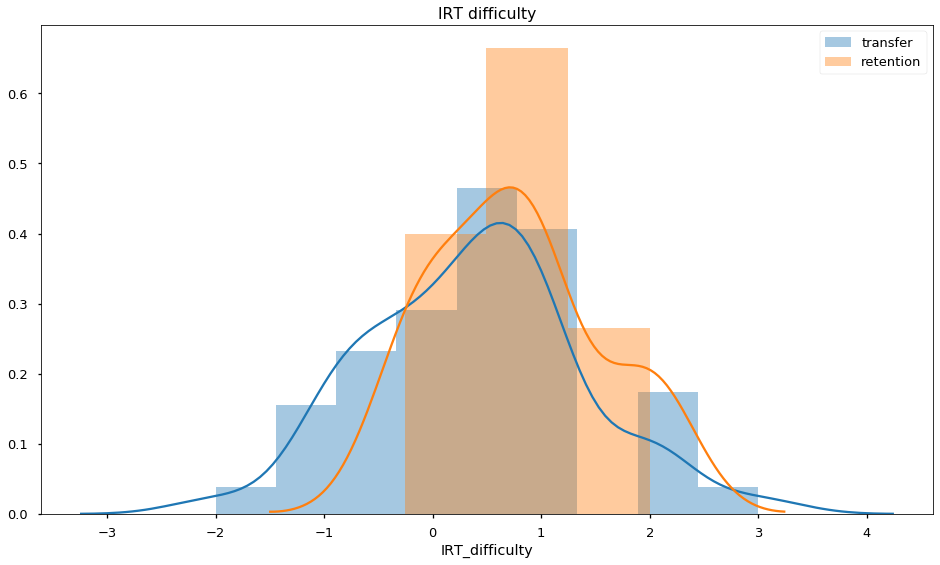

In [13]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.IRT_difficulty[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.IRT_difficulty[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("IRT difficulty")
plt.legend()

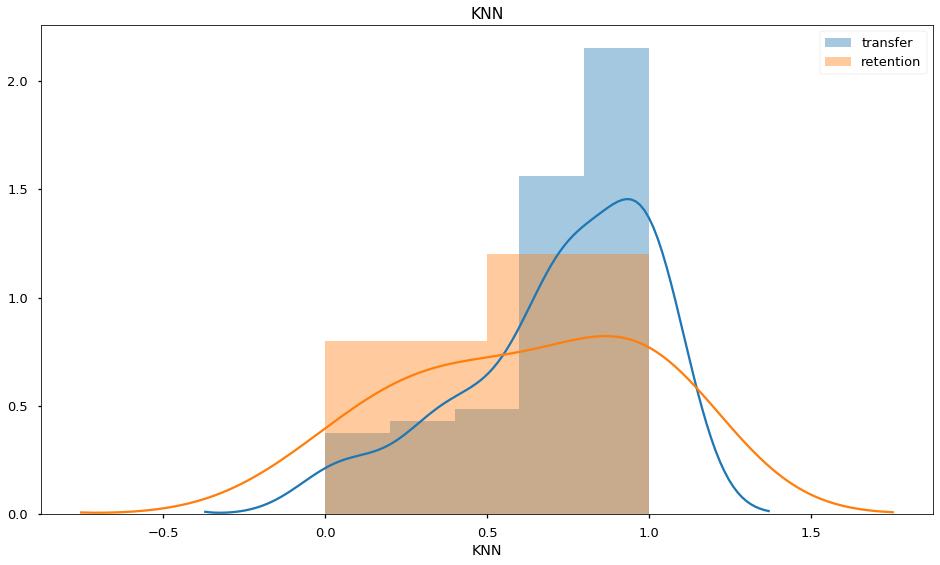

In [14]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.KNN[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.KNN[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("KNN")
plt.legend()

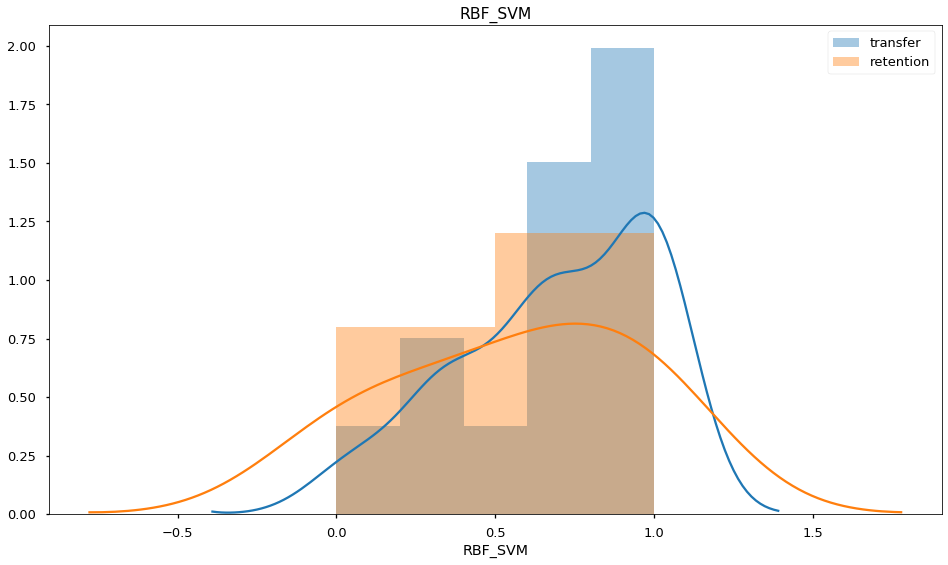

In [15]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.RBF_SVM[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.RBF_SVM[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("RBF_SVM")
plt.legend()

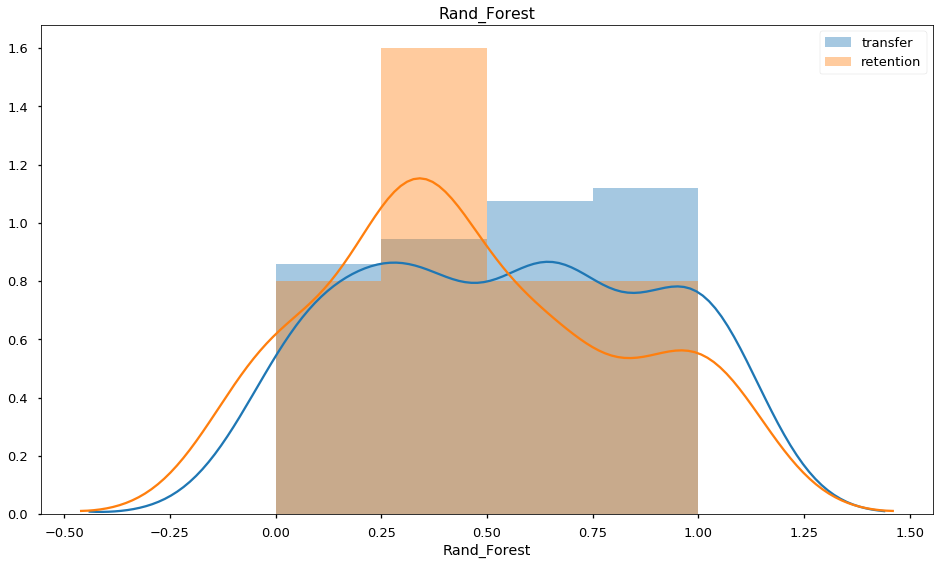

In [16]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.Rand_Forest[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.Rand_Forest[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("Rand_Forest")
plt.legend()

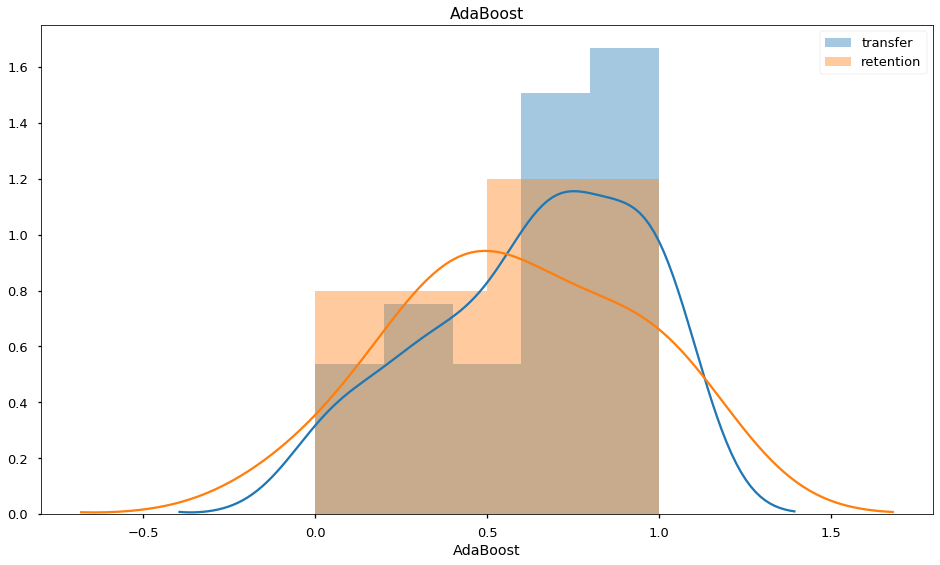

In [17]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.AdaBoost[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.AdaBoost[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("AdaBoost")
plt.legend()

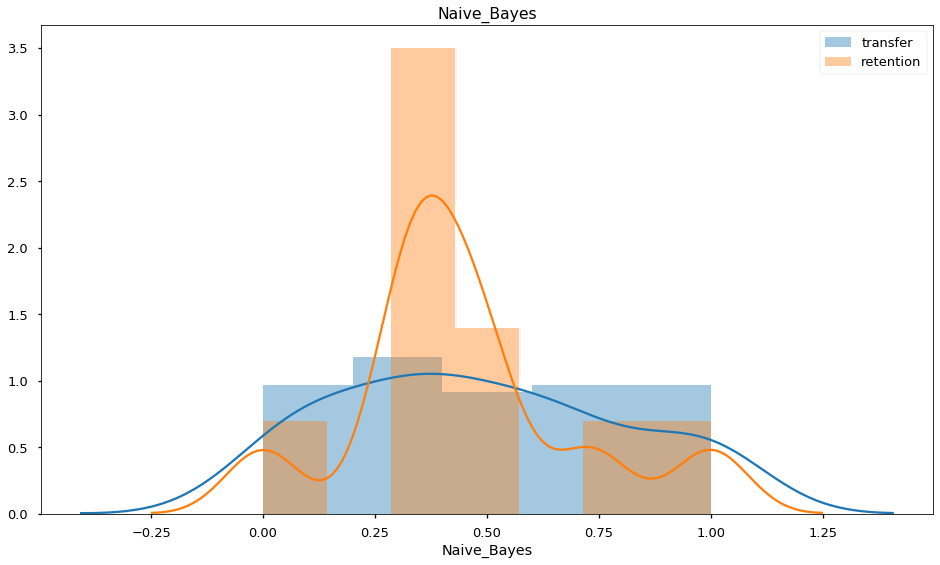

In [18]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.Naive_Bayes[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.Naive_Bayes[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("Naive_Bayes")
plt.legend()

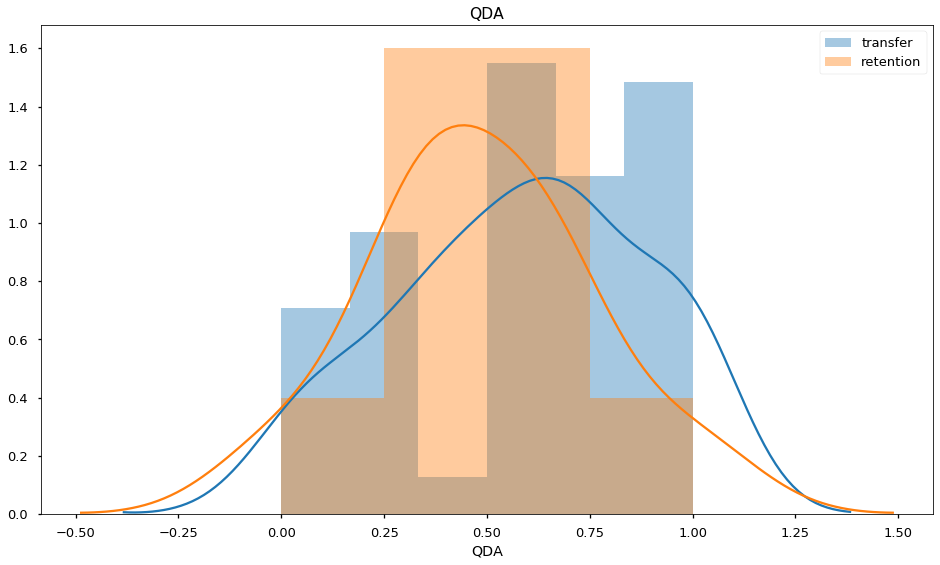

In [19]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.QDA[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.QDA[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("QDA")
plt.legend()


In [20]:
dat_heat=pd.concat([data.loc[(data.process=="transfer")|(data.process=="retention"),["IRT_difficulty","KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"]],
                      pd.get_dummies(data.loc[(data.process=="transfer")|(data.process=="retention"),["process"]])], axis=1, sort=False)
# dat_heat.index=data.loc[(data.process=="transfer")|(data.process=="retention"),["item_code"]]
dat_heat.sample(15)          

,IRT_difficulty,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA,process_retention,process_transfer
item_code,,,,,,,,,
EM_47,0.934309,0.857143,1.000000,1.000000,1.000000,0.666667,1.000000,0,1
MX_36b,-1.000000,0.642857,0.642857,0.642857,0.500000,0.500000,0.500000,0,1
MX_11a,-0.934309,0.642857,0.642857,0.100000,0.300000,0.642857,0.642857,0,1
MX_53,0.897942,0.642857,0.642857,0.642857,0.500000,0.300000,0.300000,1,0
ST_25b2,0.619039,0.333333,0.333333,0.333333,0.333333,0.733333,0.333333,1,0
SE_22b,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,1
LF_13a,0.356675,0.333333,0.333333,0.333333,0.733333,0.333333,0.333333,0,1
ST_25b1,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0
MX_16a,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0,1


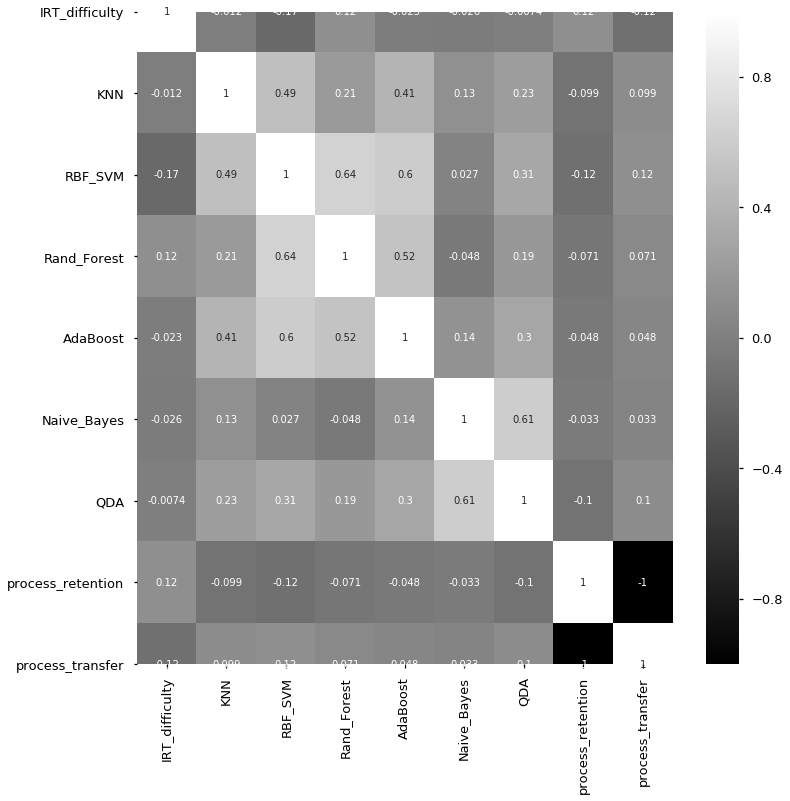

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(dat_heat.corr(), annot=True, vmin=-1, vmax=1,cmap="gray")

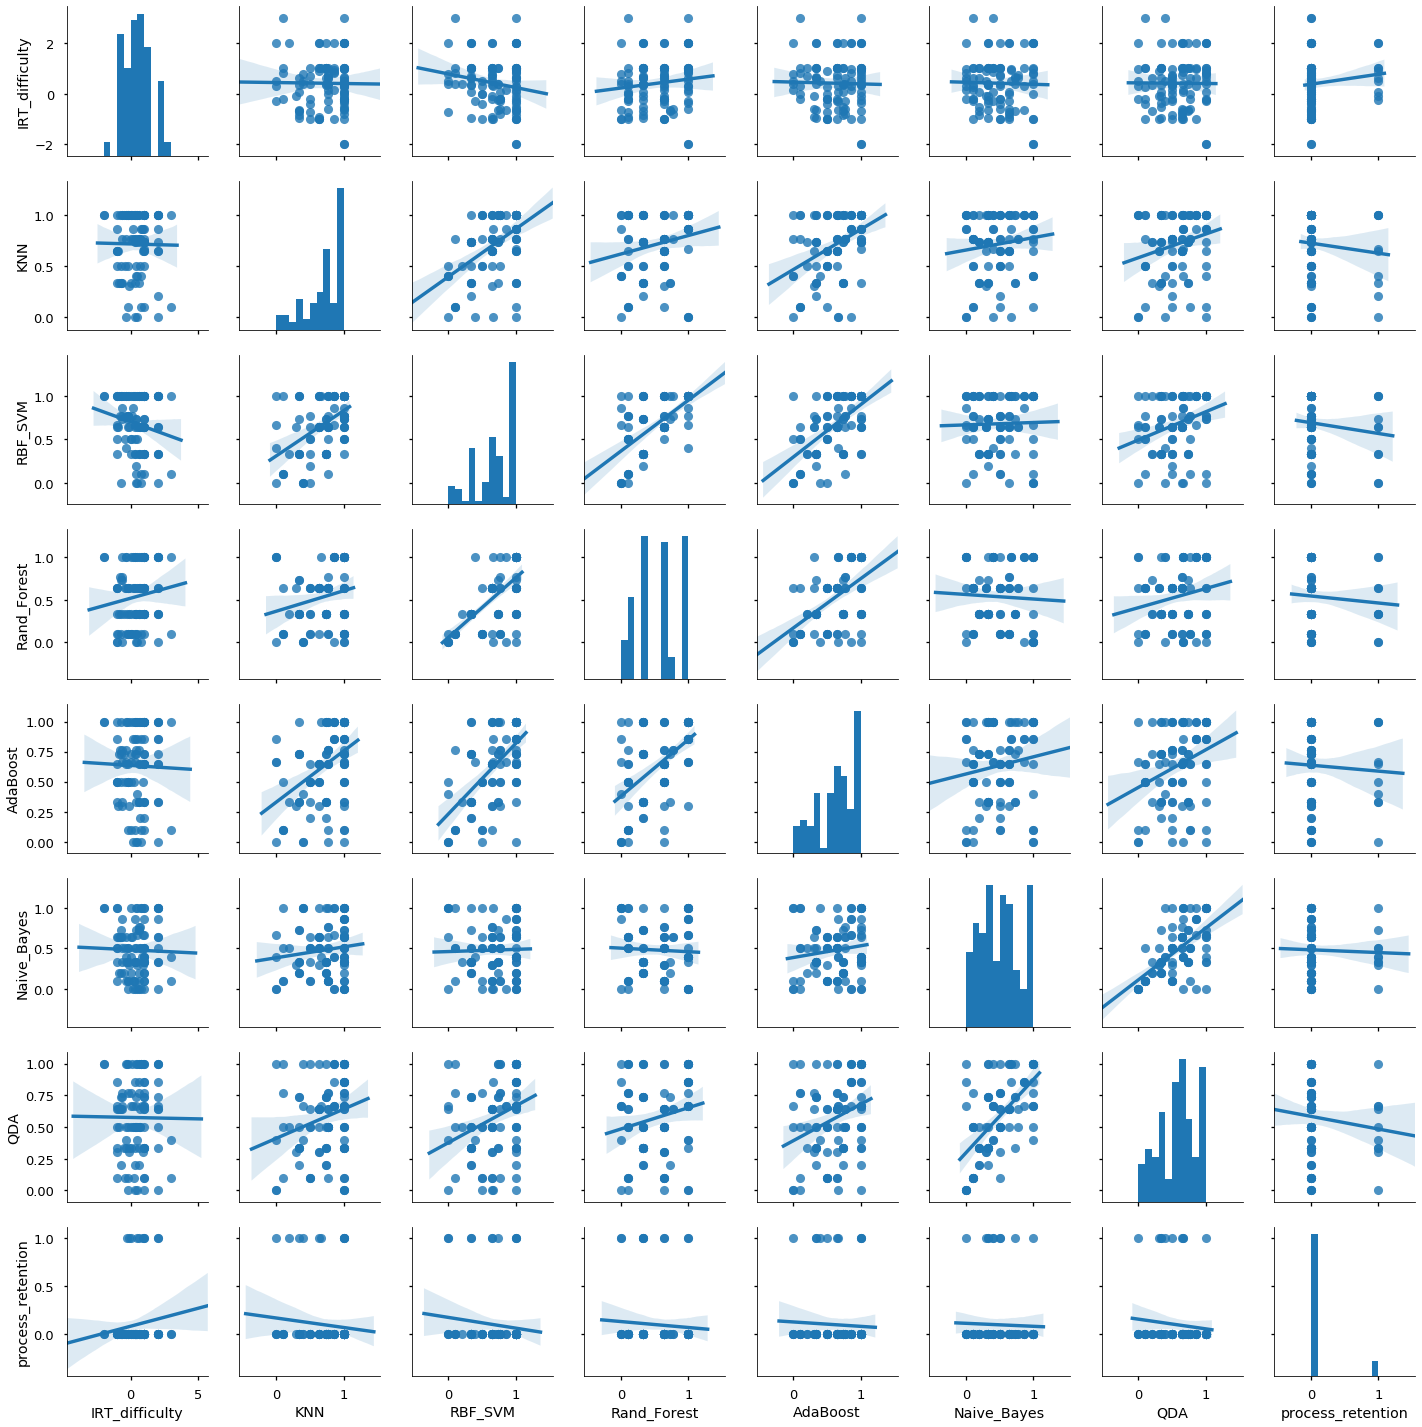

In [22]:
sns.pairplot(dat_heat.iloc[:,:-1], kind="reg")

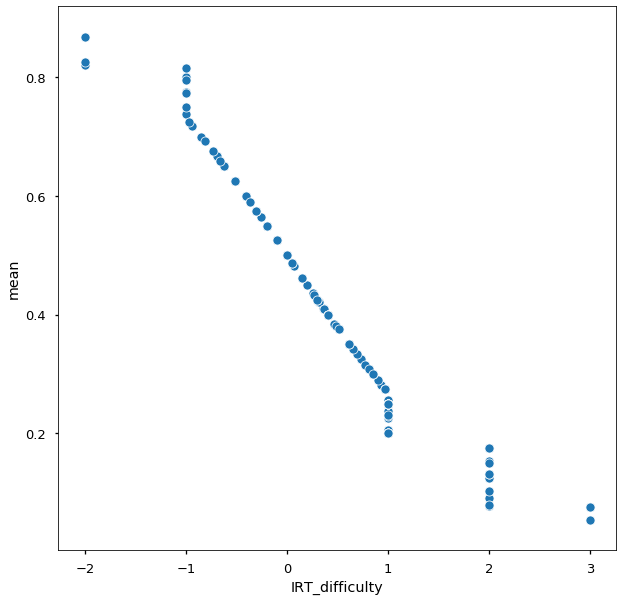

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(data.IRT_difficulty,data["mean"])

# Jueces (Descriptivos)

In [24]:
data_jueces=pd.read_csv("votos_jueces.csv", sep=";", decimal=",", index_col=0)
data_jueces.drop(["EM_45c","LF_18a","LF_31b"],inplace=True)
data_jueces[data_jueces[["Recordar","Comprender","Aplicar","Analizar","Evaluar","Crear"]]==0]=np.nan
data_jueces.sample(15)

,Recordar,Comprender,Aplicar,Analizar,Evaluar,Crear,agree_prop_6,proceso_6,n_votes,agree_prop_2,proceso_2,Transfer
item_code,,,,,,,,,,,,
ME_79,NaN,2.0,NaN,NaN,1.0,NaN,0.67,Comprender,3,1.00,Transferir,3
MS_64a,NaN,NaN,NaN,NaN,1.0,NaN,1.00,Evaluar,1,1.00,Transferir,1
MX_22a,NaN,3.0,NaN,NaN,NaN,NaN,1.00,Comprender,3,1.00,Transferir,3
MX_24,1.0,1.0,1.0,NaN,NaN,NaN,0.33,undefined,3,0.67,Transferir,2
VB_22c,NaN,1.0,NaN,NaN,NaN,NaN,1.00,Comprender,1,1.00,Transferir,1
MS_43a,NaN,1.0,NaN,1.0,1.0,NaN,0.33,undefined,3,1.00,Transferir,3
FN_17c,NaN,2.0,1.0,NaN,NaN,NaN,0.67,Comprender,3,1.00,Transferir,3
ST_25b1,3.0,NaN,NaN,NaN,NaN,NaN,1.00,Recordar,3,1.00,Retener,0
MS_39,1.0,2.0,NaN,NaN,NaN,NaN,0.67,Comprender,3,0.67,Transferir,2


In [25]:
round(data_jueces.describe(),2)

,Recordar,Comprender,Aplicar,Analizar,Evaluar,Crear,agree_prop_6,n_votes,agree_prop_2,Transfer
count,21.00,83.00,29.00,56.00,32.00,13.00,131.00,131.00,131.00,131.00
mean,1.81,1.40,1.03,1.27,1.09,1.23,0.71,2.34,0.97,2.05
std,0.87,0.56,0.19,0.45,0.30,0.44,0.24,0.87,0.11,0.99
min,1.00,1.00,1.00,1.00,1.00,1.00,0.33,1.00,0.50,0.00
25%,1.00,1.00,1.00,1.00,1.00,1.00,0.50,2.00,1.00,1.00
50%,2.00,1.00,1.00,1.00,1.00,1.00,0.67,2.00,1.00,2.00
75%,2.00,2.00,1.00,2.00,1.00,1.00,1.00,3.00,1.00,3.00
max,4.00,3.00,2.00,2.00,2.00,2.00,1.00,4.00,1.00,4.00


In [26]:
pd.crosstab(index=data_jueces.n_votes, columns="count")

col_0,count
n_votes,
1,26
2,44
3,52
4,9


In [27]:
round((pd.crosstab(index=data_jueces.n_votes, columns="count")/data_jueces.shape[0])*100,2)#.cumsum()

col_0,count
n_votes,
1,19.85
2,33.59
3,39.69
4,6.87


In [28]:
pd.crosstab(index=data_jueces.proceso_6, columns="count")

col_0,count
proceso_6,
Analizar,17
Aplicar,3
Comprender,42
Crear,3
Evaluar,4
Recordar,12
undefined,50


In [29]:
round((pd.crosstab(index=data_jueces.proceso_6, columns="count")/data_jueces.shape[0])*100,2)#.cumsum()

col_0,count
proceso_6,
Analizar,12.98
Aplicar,2.29
Comprender,32.06
Crear,2.29
Evaluar,3.05
Recordar,9.16
undefined,38.17


In [30]:
pd.crosstab(index=data_jueces.proceso_2, columns="count")

col_0,count
proceso_2,
Retener,12
Transferir,115
undefined,4


In [31]:
round((pd.crosstab(index=data_jueces.proceso_2, columns="count")/data_jueces.shape[0])*100,2)#.cumsum()

col_0,count
proceso_2,
Retener,9.16
Transferir,87.79
undefined,3.05


# Final Results
* [matplotlib scatter-hist](https://matplotlib.org/examples/pylab_examples/scatter_hist.html)
* [seaborn jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

In [32]:
data_final=pd.read_csv("final reults.csv", sep=";", decimal=",", index_col=0)
data_final.drop(["EM_45c","LF_18a","LF_31b"],inplace=True)

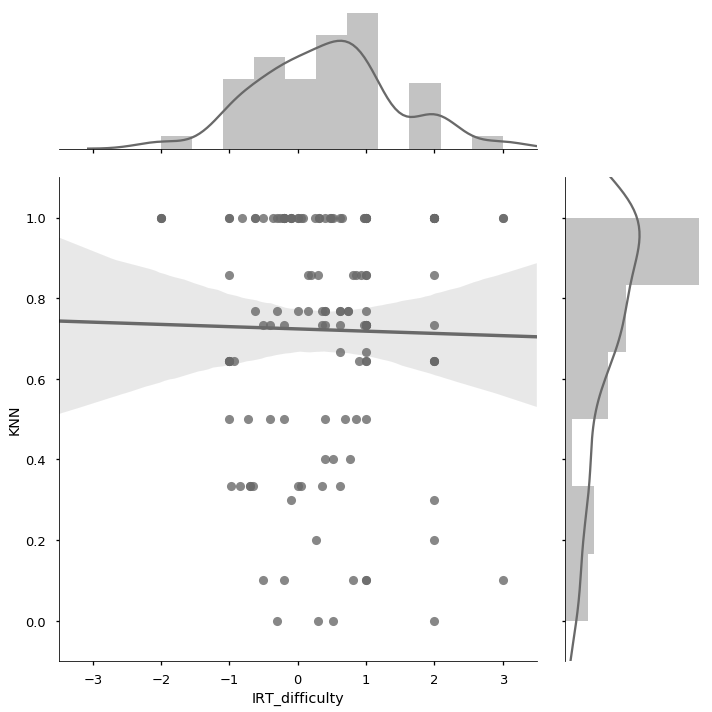

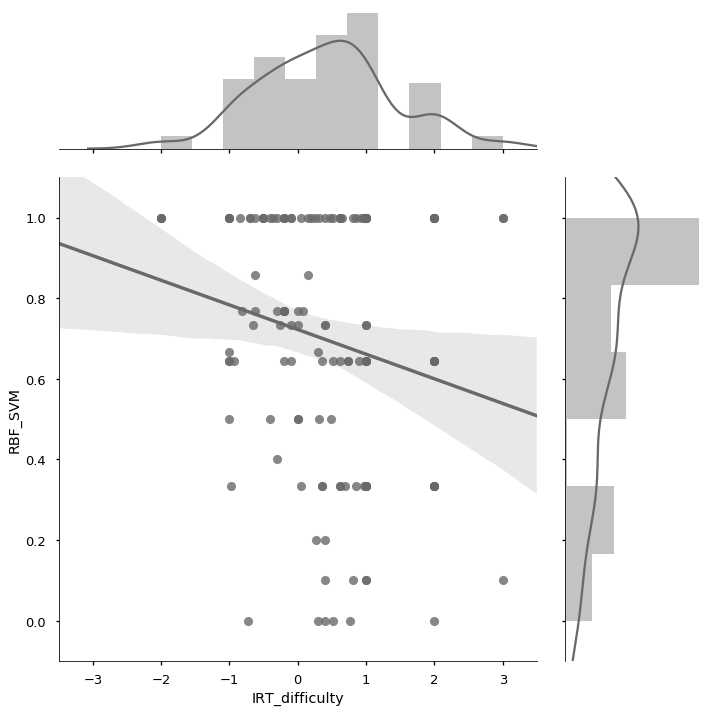

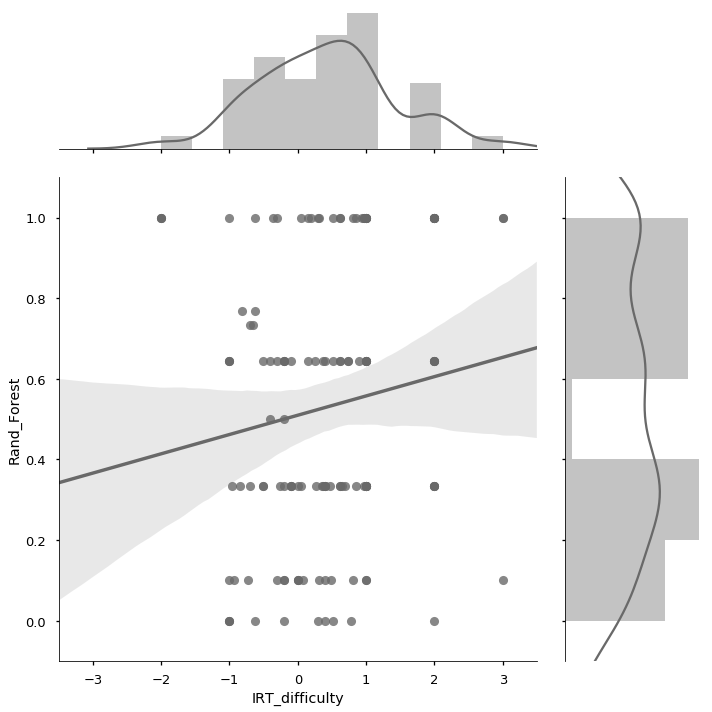

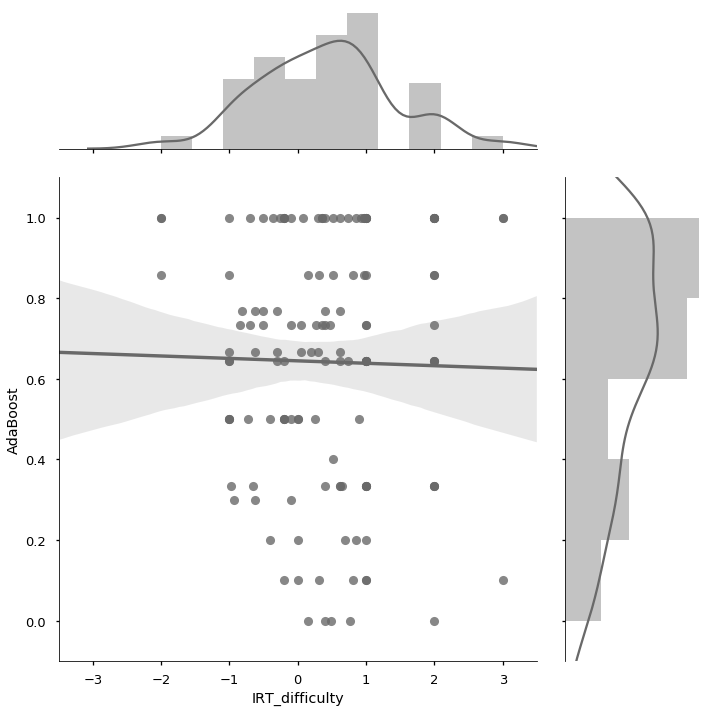

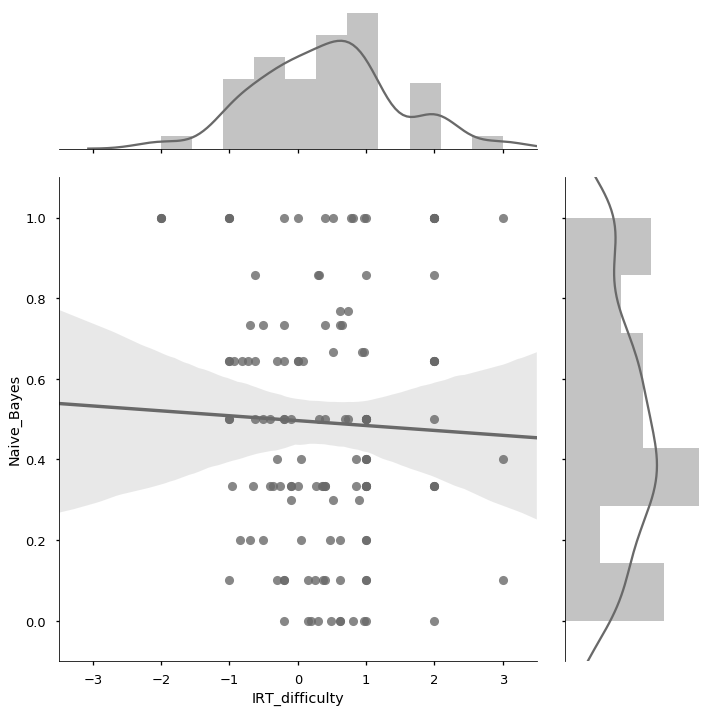

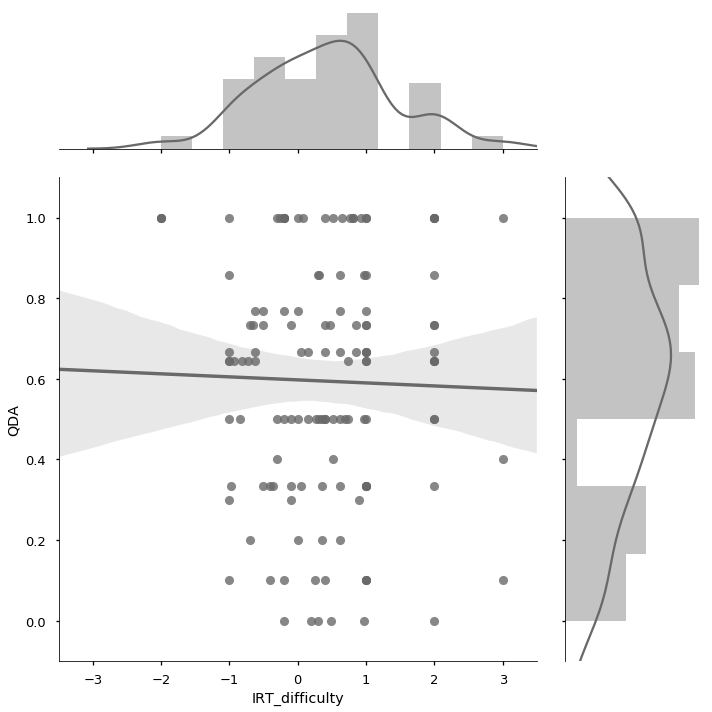

In [33]:
for clasif in ["KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"]:
    sns.jointplot("IRT_difficulty", clasif, data=data_final,kind="reg", 
                  height=10, ratio=3, color="dimgrey",
                  xlim=(-3.5,3.5), ylim=(-0.1,1.1))